In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , f1_score


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [3]:
#reading Data
train_df = pd.read_csv('/content/Train_Data (1).csv')
train_df

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,69,12,818,DX6,58,25.515286,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
25916,21001,39,11500,DX6,16,27.094959,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
25917,4263,44,2796,DX1,8,28.602921,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
25918,11208,52,12190,DX1,52,21.909832,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1


In [4]:
train_df.drop(columns=['ID1','ID2','Any heriditary condition?'],inplace=True)
# "Any heriditary" because it has same value

# Feature Engineerging

In [5]:
train_df.describe()

,Specific ailments,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
count,25920.000000,25920.000000,25920.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,24947.000000,25920.000000
mean,26.502701,33.235610,23.461925,0.895739,0.138053,0.184391,0.084219,0.396881,0.053073,0.000401,1.752756,0.628858
std,15.056563,19.532157,3.791150,0.305605,0.344962,0.387810,0.277721,0.489261,0.224183,0.020018,0.767824,0.483120
min,0.000000,0.000000,1.145000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.000000,16.000000,20.214882,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,33.000000,23.415330,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,40.000000,50.000000,26.768378,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,52.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [6]:
for column in train_df:
    print(column,train_df[column].unique())

Specific ailments [44 39 29 27  9 13 21  7 18 20 16 49 51 15  4  5 33 10 41 38 14 12 43 28
  6 34  1 17  2 48 36 19 25 11 37 52 42  8 24 31 30 26 50 22 40 32 45 47
 35  3 46 23  0]
Food preference ['DX6' 'DX3 DX4 ' 'DX1 ' 'DX4 DX5 ' 'DX5 ' 'DX2 ' 'DX2 DX4 '
 'DX2 DX4 DX5 ' 'DX2 DX5 ' 'DX3 ' 'DX1 DX5 ' 'DX4 ' 'DX1 DX3 ' 'DX1 DX2 '
 'DX1 DX3 DX4 ' 'DX1 DX3 DX5 ' 'DX1 DX2 DX5 ' 'DX2 DX3 DX5 ' 'DX1 DX4 '
 'DX2 DX3 DX4 ' 'DX1 DX2 DX3 ' 'DX2 DX3 ' 'DX3 DX4 DX5 ' 'DX1 DX4 DX5 '
 'DX1 DX2 DX4 ' 'DX3 DX5 ' 'DX1 DX3 DX4 DX5 ' 'DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX4 DX5 ' nan 'DX1 DX2 DX3 DX5 ' 'DX1 DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX3 DX4 ']
Age [ 49  20   1  30  40  64  26   4  12  42  65   3  63  32  10  48  47   9
  11   7  24  23  25  62  13   8  57  52  54  44  56  22  29  60  43  58
   5  27  15  51  37  46  19  17  16   0   6  34  50  33  41  28  21   2
  18  59  53  31  39  66  55  61  36  45  14  35  38 114 125 132 112 149
 128 142 115 138]
BMI [20.50046954 26.07657952 21.42086578 ... 20.13510775 2

In [7]:
train_df.isnull().sum()

Specific ailments             0
Food preference              10
Age                           0
BMI                           0
Smoker?                       0
Living in?                    0
Follow Diet                 973
Physical activity           973
Regular sleeping hours      973
Alcohol consumption         973
Social interaction          973
Taking supplements          973
Mental health management    973
Illness count last year     973
Healthy                       0
dtype: int64

In [8]:
train_df.columns.get_loc('Illness count last year')

13

In [9]:
arr = np.array(train_df['Food preference'].values)
arr.reshape(-1)

new_arr = [x.strip().split(' ') if pd.notna(x) else [] for x in arr]

mlb = MultiLabelBinarizer()
encoded_data = mlb.fit_transform(new_arr)
encoded_df = pd.DataFrame(encoded_data, columns=mlb.classes_)

train_df = pd.concat([train_df,encoded_df],axis=1)

train_df.drop(columns=['Food preference'],axis =1 , inplace = True)
train_df

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
0,44,49,20.500470,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1
1,39,20,26.076580,NO,URBAN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,1,0,0
2,29,1,21.420866,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
3,27,30,25.203247,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0
4,9,40,19.355846,YES,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,12,58,25.515286,YES,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1
25916,39,16,27.094959,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
25917,44,8,28.602921,NO,RURAL,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,1,0,0,0,0,0
25918,52,52,21.909832,NO,RURAL,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1,1,0,0,0,0,0


In [10]:
le = LabelEncoder()
train_df['Living in?'] = le.fit_transform(train_df['Living in?'])
train_df = pd.get_dummies(train_df,columns=['Smoker?'])
train_df

,Specific ailments,Age,BMI,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,...,Healthy,DX1,DX2,DX3,DX4,DX5,DX6,Smoker?_Cannot say,Smoker?_NO,Smoker?_YES
0,44,49,20.500470,0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,0
1,39,20,26.076580,1,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,1,1,0,0,0,1,0
2,29,1,21.420866,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,27,30,25.203247,0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,1,0
4,9,40,19.355846,0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,12,58,25.515286,0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
25916,39,16,27.094959,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
25917,44,8,28.602921,0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,1,0
25918,52,52,21.909832,0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,1,0,0,0,0,0,0,1,0


In [11]:
# columns = train_df.columns

In [12]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer()
# train_df = imputer.fit_transform(X=train_df)
# train_df = pd.DataFrame(data=train_df,columns=columns)

In [13]:
# train_df_imputer = train_df.copy()
# train_df.dropna(inplace=True)

In [14]:
train_df.columns

Index(['Specific ailments', 'Age', 'BMI', 'Living in?', 'Follow Diet',
       'Physical activity', 'Regular sleeping hours', 'Alcohol consumption',
       'Social interaction', 'Taking supplements', 'Mental health management',
       'Illness count last year', 'Healthy', 'DX1', 'DX2', 'DX3', 'DX4', 'DX5',
       'DX6', 'Smoker?_Cannot say', 'Smoker?_NO', 'Smoker?_YES'],
      dtype='object')

# Data Visualization

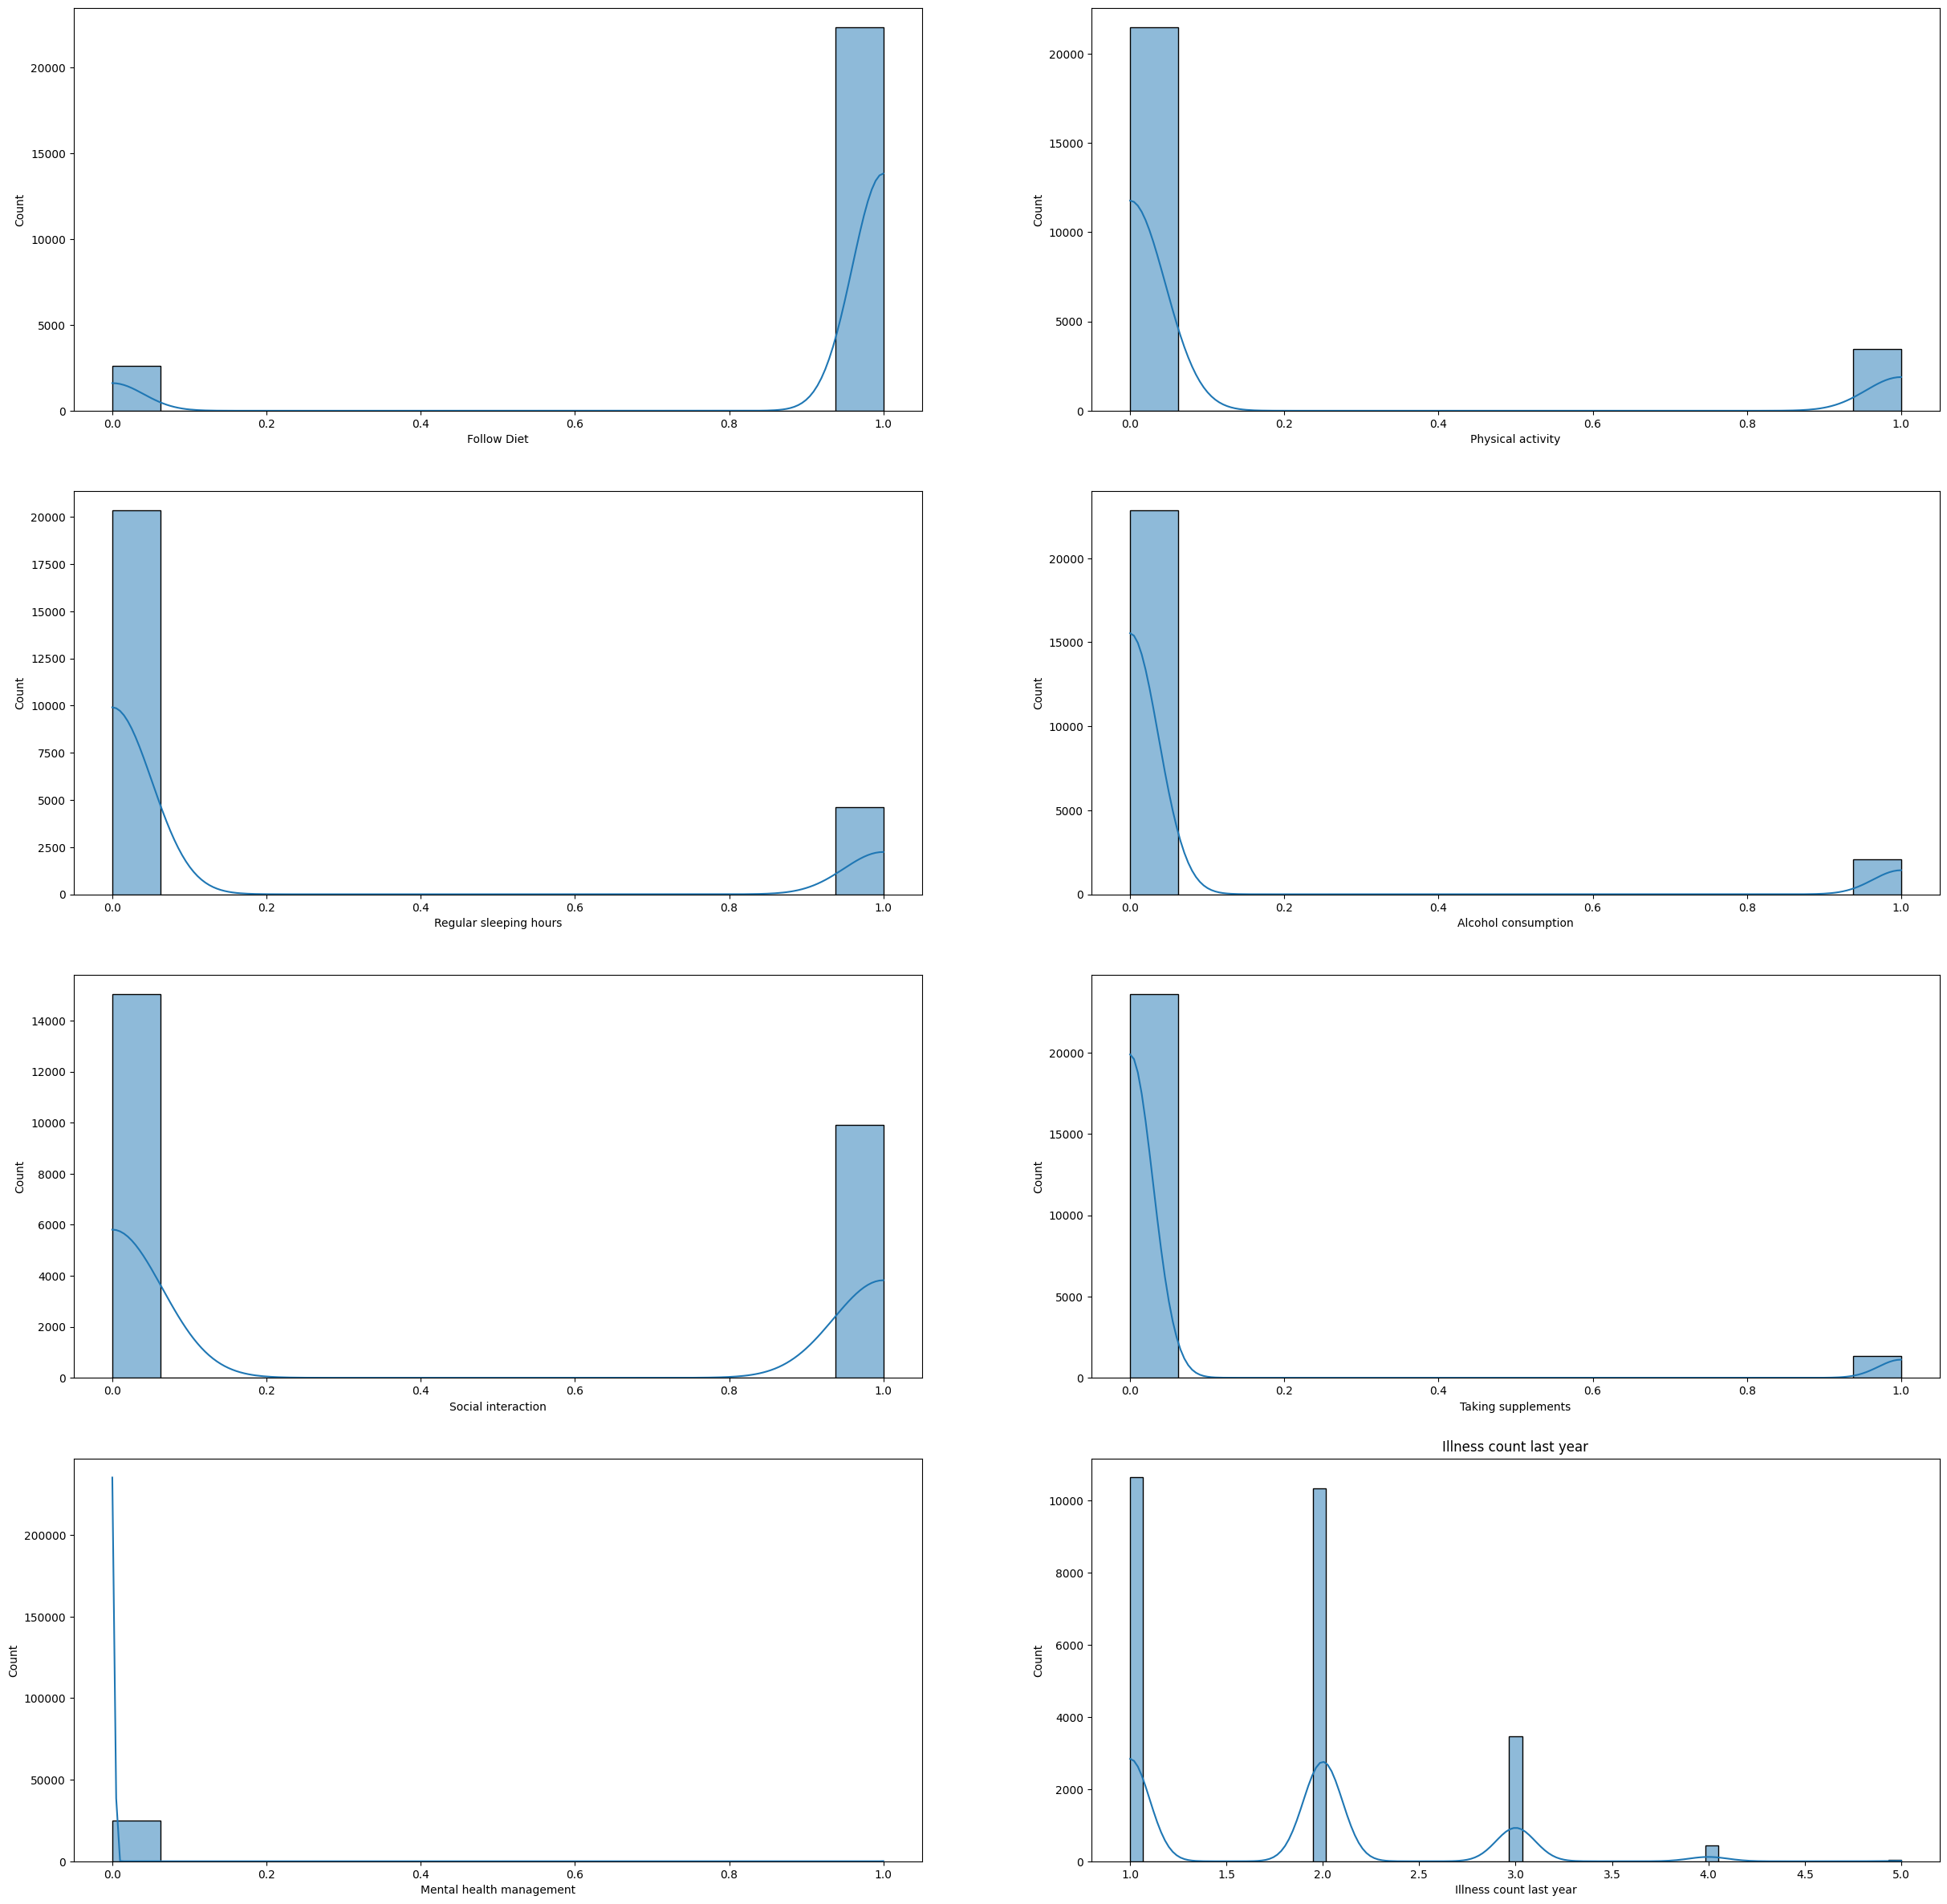

In [15]:
import seaborn as sns
fig, axes = plt.subplots(4, 2, figsize=(30, 30))
count=0
df_train = train_df[['Follow Diet','Physical activity',
       'Regular sleeping hours', 'Alcohol consumption', 'Social interaction',
       'Taking supplements', 'Mental health management',
       'Illness count last year']]
for column in df_train:
    j = int(count/2)
    i = int(count % 2)
    count=count+1
    sns.histplot(df_train[column], kde=True, ax =axes[j,i])
    plt.title(column)

<Axes: xlabel='Healthy', ylabel='count'>

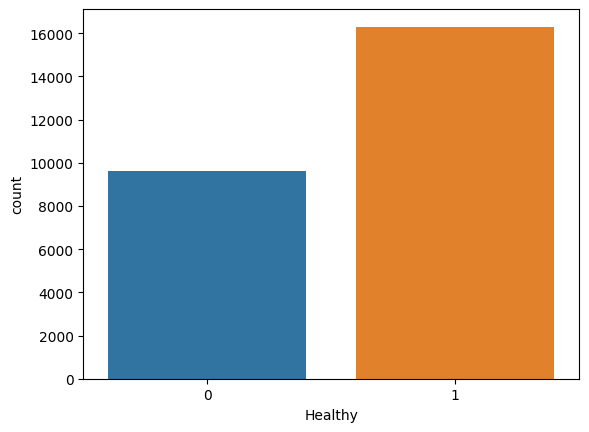

In [16]:
sns.countplot(x=train_df['Healthy'])

<Axes: >

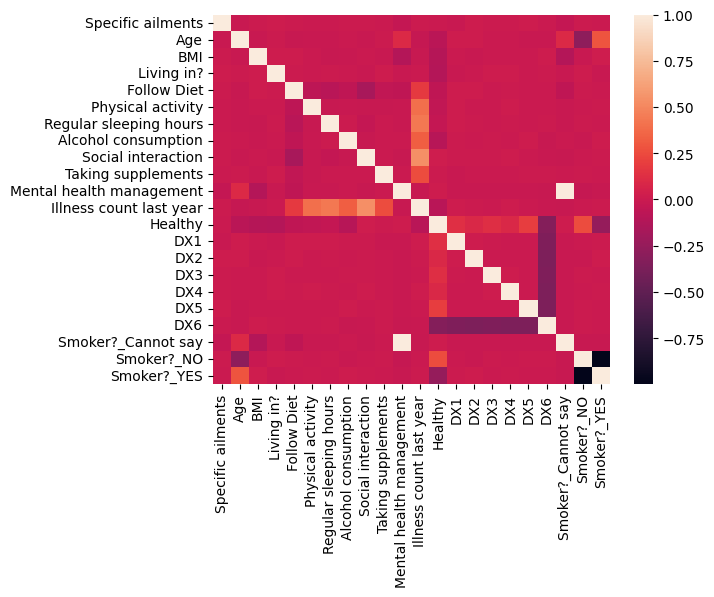

In [17]:
sns.heatmap(train_df.corr())

# doing with imputing

In [18]:
train_df

,Specific ailments,Age,BMI,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,...,Healthy,DX1,DX2,DX3,DX4,DX5,DX6,Smoker?_Cannot say,Smoker?_NO,Smoker?_YES
0,44,49,20.500470,0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,0
1,39,20,26.076580,1,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,1,1,0,0,0,1,0
2,29,1,21.420866,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,27,30,25.203247,0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,1,0
4,9,40,19.355846,0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25915,12,58,25.515286,0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
25916,39,16,27.094959,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
25917,44,8,28.602921,0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,1,0
25918,52,52,21.909832,0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,1,0,0,0,0,0,0,1,0


In [27]:
train_df.columns

Index(['Specific ailments', 'Age', 'BMI', 'Living in?', 'Follow Diet',
       'Physical activity', 'Regular sleeping hours', 'Alcohol consumption',
       'Social interaction', 'Taking supplements', 'Mental health management',
       'Illness count last year', 'Healthy', 'DX1', 'DX2', 'DX3', 'DX4', 'DX5',
       'DX6', 'Smoker?_Cannot say', 'Smoker?_NO', 'Smoker?_YES'],
      dtype='object')

In [28]:
# splitting into train anmd test with sampling
X = train_df.drop(['Healthy','Smoker?_Cannot say','Mental health management','Taking supplements'],axis =1)
columns= X.columns
imputer = KNNImputer()
X = imputer.fit_transform(X)
X = pd.DataFrame(data=X,columns=columns)
y = train_df['Healthy']
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_sample, y_sample = ros.fit_resample(X, y)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sample, y_sample, test_size = 0.1)

In [29]:
# without sampling
# X = train_df.drop(['Healthy'],axis =1)
# y = train_df['Healthy']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

In [30]:
# with sampling
from sklearn.preprocessing import StandardScaler
sc_x_sample = StandardScaler()
X_std = sc_x_sample.fit_transform(X_sample)

X_train_std_s, X_test_std_s, y_train_std_s, y_test_std_s= train_test_split(X_std, y_sample, test_size = 0.1)

In [31]:
# without sampling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size = 0.1)

# Model Building

In [32]:
def evaluate(model,X_train,X_test,y_train,y_test,param=None):


    if param != None:
        gs = GridSearchCV(model, param, cv=5,scoring='f1').fit(X_train, y_train)
        gs.fit(X_train,y_train)
        print("The best hyperparameters are ",gs.best_params_)
        model.set_params(**gs.best_params_)

    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    train_model_score = f1_score(y_train, y_train_pred)

    test_model_score = f1_score(y_test, y_test_pred)
    cm_test = confusion_matrix(y_test,y_test_pred)
    cm_train = confusion_matrix(y_train,y_train_pred)
    dp_train = ConfusionMatrixDisplay(cm_train)
    dp_test = ConfusionMatrixDisplay(cm_test)

    print("the test f1_score is", test_model_score )
    print("the training f1_score is", train_model_score)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,ax =axes[0])
    axes[0].set_title('For test data')

    ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,ax =axes[1])
    axes[1].set_title('For train data')



    plt.show()


In [24]:
# axes[1,0].barh(X_train.columns, model.feature_importances_)
#     axes[1,0].set_title('Feature Importance')
#     axes[1,0].grid()
#     plt.delaxes(axes[1,1])

## Logistic Regression

### without oversampling and std

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the test f1_score is 0.7973593570608495
the training f1_score is 0.7962868444557867


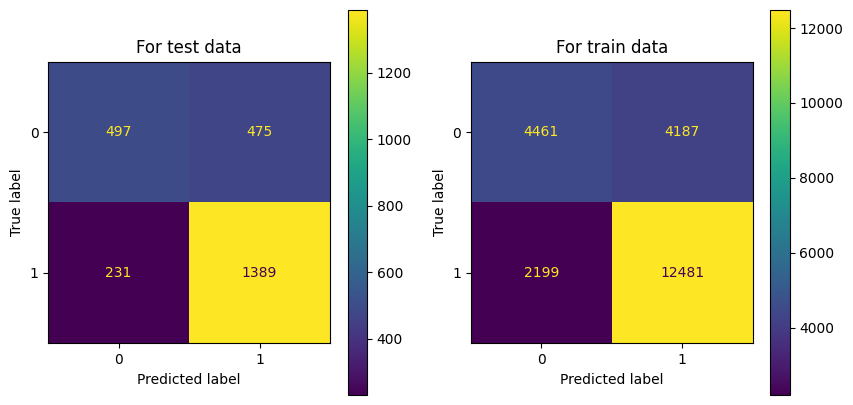

In [25]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
evaluate(lreg,X_train, X_test, y_train, y_test)

### with oversampling without std

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


the test f1_score is 0.7148472936195949
the training f1_score is 0.7149134853062347


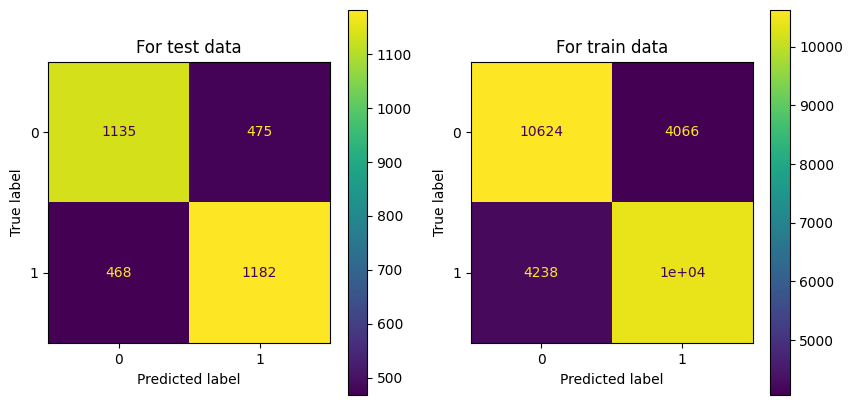

In [26]:
lreg_s = LogisticRegression()
evaluate(lreg_s,X_train_s, X_test_s, y_train_s, y_test_s)

### with std without oversampling

the test f1_score is 0.8006892590465249
the training f1_score is 0.7967199515012284


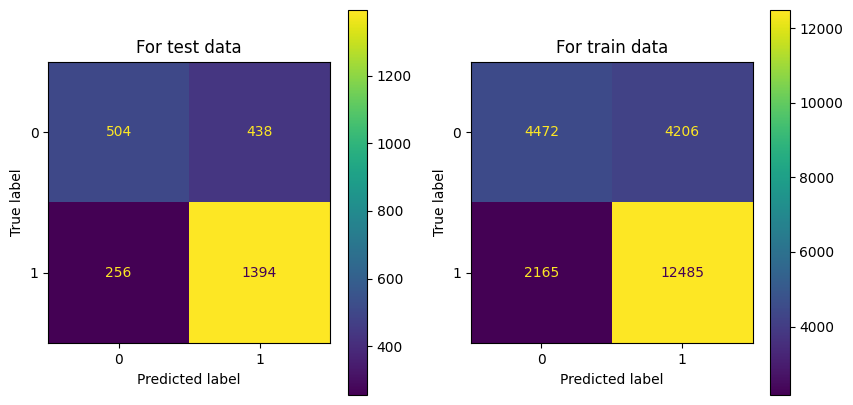

In [27]:
lreg_std = LogisticRegression()
evaluate(lreg_std,X_train_std, X_test_std, y_train_std, y_test_std)

### with both

the test f1_score is 0.7227813357731016
the training f1_score is 0.7144765231686017


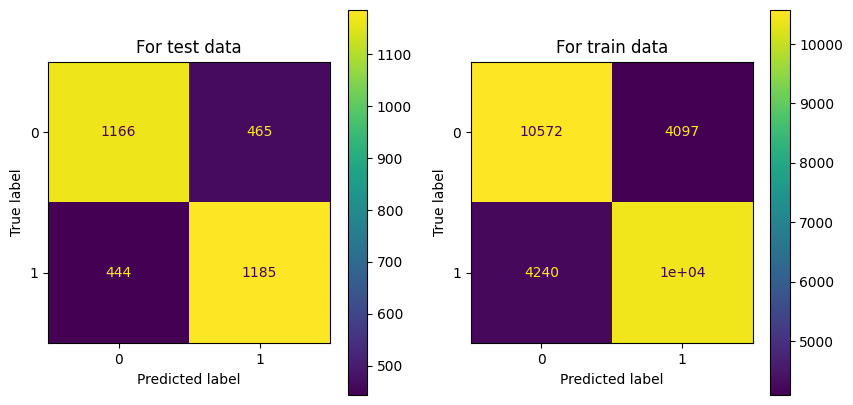

In [28]:
lreg_std_s = LogisticRegression()
evaluate(lreg_std_s, X_train_std_s, X_test_std_s, y_train_std_s, y_test_std_s)

## Decision Tree

The best hyperparameters are  {'max_depth': 10, 'splitter': 'best'}
the test f1_score is 0.8519987793713762
the training f1_score is 0.8891578416540594


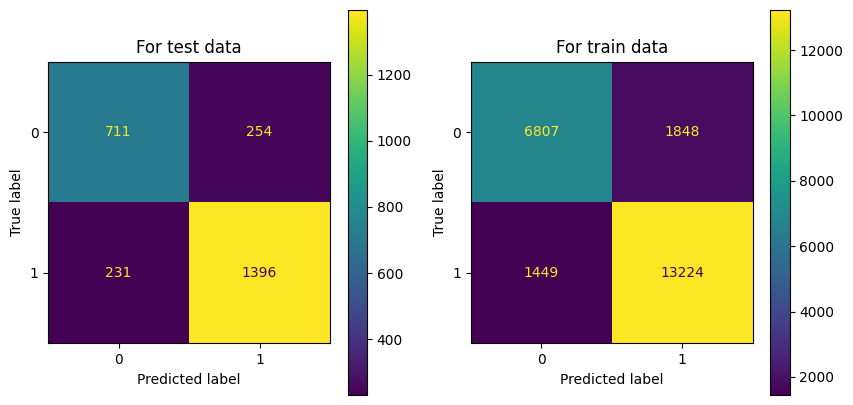

In [33]:
dt = DecisionTreeClassifier()
param = {'splitter':['best', 'random'],
         'max_depth': [ 8,9,15,10]}
evaluate(dt,X_train,X_test,y_train,y_test,param)

In [38]:
# dt_s = DecisionTreeClassifier()
# param = {'splitter':['best', 'random'],
#          'min_samples_split': [0.001,0.0001],
#           'min_samples_leaf': [0.001,0.0005]
#     }
# evaluate(dt_s,X_train_s,X_test_s,y_train_s,y_test_s,param)

## Random Forest

The best hyperparameters are  {'max_depth': 16, 'n_estimators': 650}
the test f1_score is 0.8645864889427446
the training f1_score is 0.9643603045206495


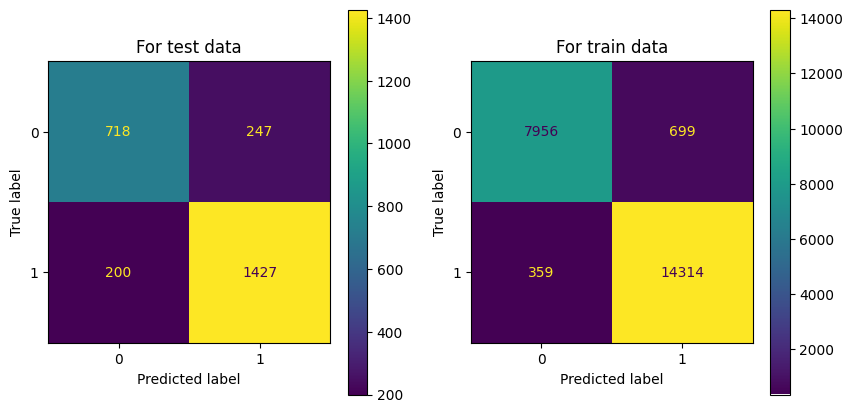

In [166]:
rf = RandomForestClassifier()
param = {'n_estimators': [650],
         'max_depth': [16]}
evaluate(rf,X_train, X_test, y_train, y_test, param = param)


<BarContainer object of 18 artists>

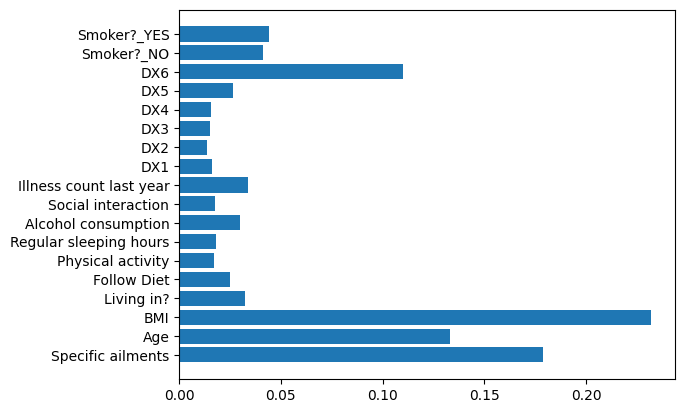

In [167]:
plt.barh(X_train.columns,rf.feature_importances_)

In [41]:
# rf_s = RandomForestClassifier()
# param = {'n_estimators': [850]}
# evaluate(rf_s,X_train_s, X_test_s, y_train_s, y_test_s, param = param)
# plt.barh(X_train.columns,rf_s.feature_importances_)

## naive bayes

the test f1_score is 0.7459361830222758
the training f1_score is 0.7420660134434672


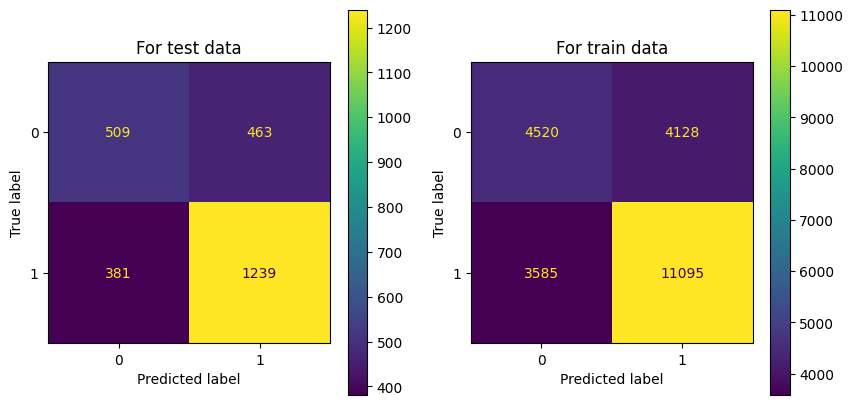

In [42]:
mnb = MultinomialNB()
evaluate(mnb,X_train, X_test, y_train, y_test, param = None)

the test f1_score is 0.6455968088370665
the training f1_score is 0.6384562370778772


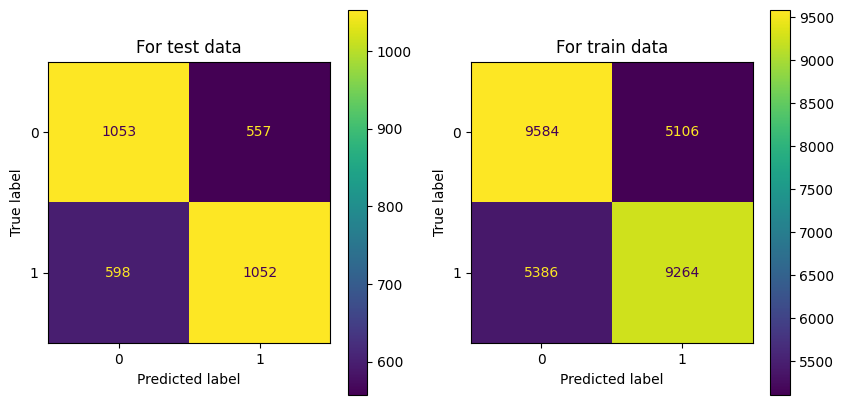

In [43]:
mnb_s = MultinomialNB()
evaluate(mnb_s,X_train_s, X_test_s, y_train_s, y_test_s, param = None)

## xgbosst

the test f1_score is 0.9159561510353228
the training f1_score is 0.9200619815878224


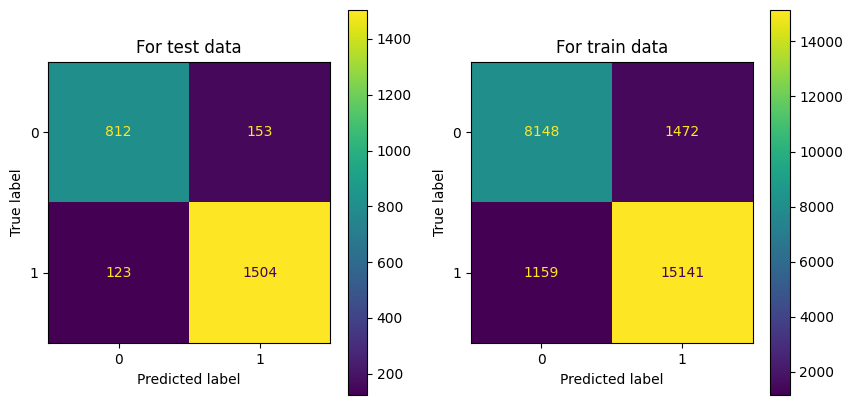

In [150]:
xg = XGBClassifier(n_estimators=80)
evaluate(xg,X, X_test, y, y_test, param = None)

the test f1_score is 0.8731274839498625
the training f1_score is 0.9232848022159916


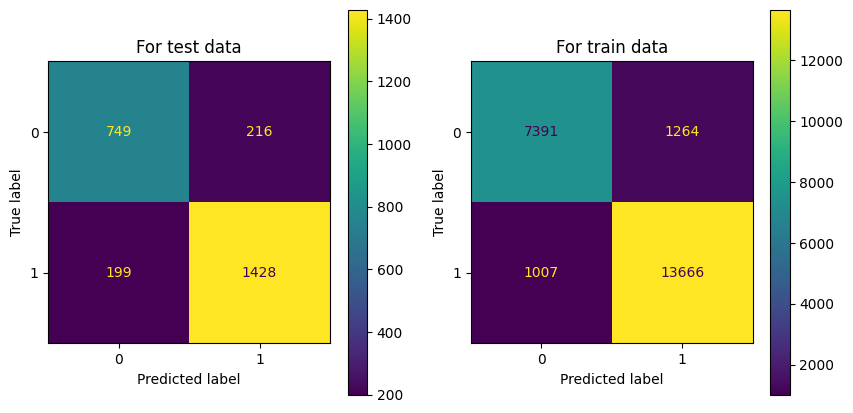

In [90]:
xg_s = XGBClassifier(n_estimators=80, objective= 'binary:logistic')
evaluate(xg_s,X_train, X_test, y_train, y_test, param = None)

## catboost

the test f1_score is 0.9007864488808227
the training f1_score is 0.9051103719383127


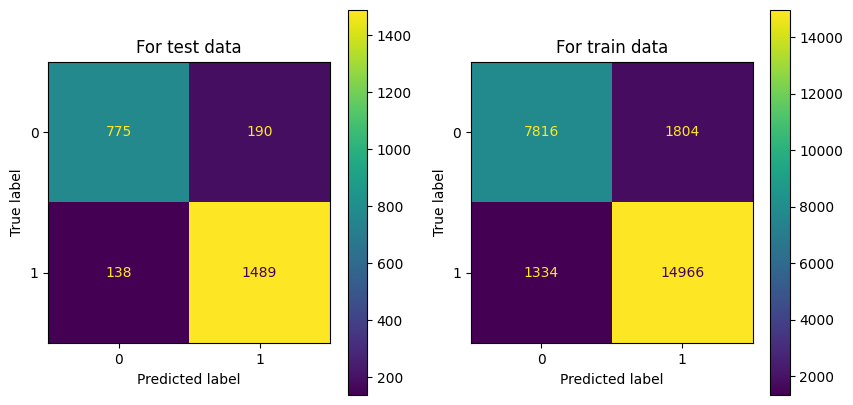

In [151]:
# !pip install catboost
from catboost import CatBoostClassifier
cat = CatBoostClassifier(verbose=False,n_estimators=500)
evaluate(cat,X, X_test, y, y_test, param =None)

<BarContainer object of 18 artists>

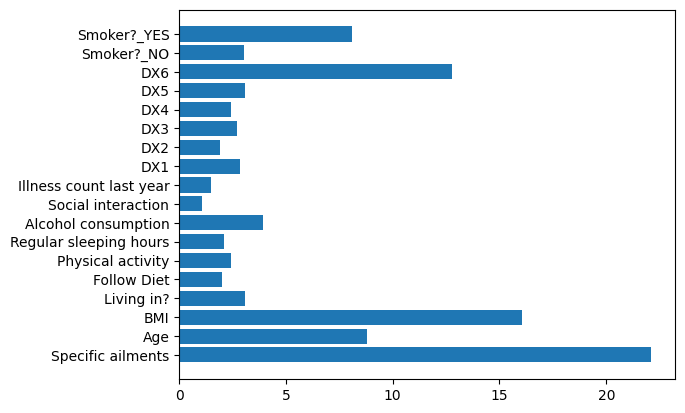

In [165]:
plt.barh(X_train.columns,cat.feature_importances_)

In [ ]:
# cat.feature_importances_calc_feature_statistics(train_df,
#                         target=train_df['Healthy'],
#                         feature=train_df.drop,
#                         prediction_type=None,
#                         cat_feature_values=None,
#                         plot=True,
#                         max_cat_features_on_plot=10,
#                         thread_count=-1,
#                         plot_file=None)

## Combination

### voting classifier

the test f1_score is 0.9311077389984825
the training f1_score is 0.932306666262467


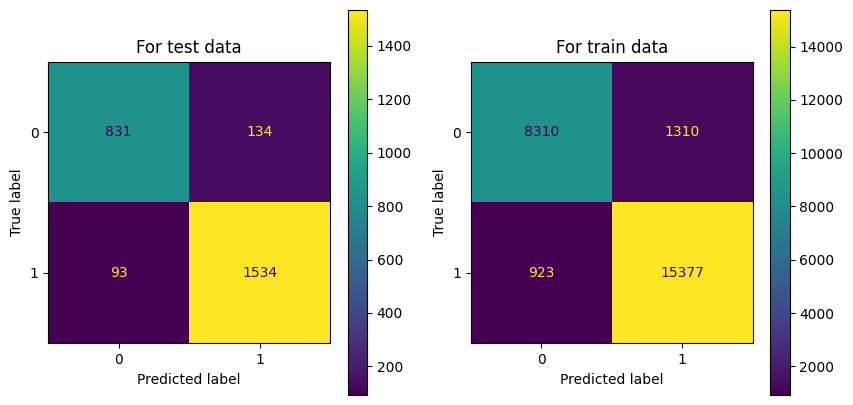

In [175]:
vc = VotingClassifier(estimators=[ ('rf', RandomForestClassifier(n_estimators=650, max_depth= 16)),
 ('xg',XGBClassifier(n_estimators=80)),('cat',CatBoostClassifier(verbose=False,n_estimators=500))], voting='soft')
evaluate(vc,X, X_test, y, y_test, param =None)

In [79]:
# vc_s = VotingClassifier(estimators=[ ('rf_s', rf_s),('xg_s',xg_s),('ada_s',ada_s),('gb_s',gb_s)], voting='soft')
# evaluate(vc_s,X_train_s, X_test_s, y_train_s, y_test_s, param =None)

### stacking

the test f1_score is 0.8748863980611936
the training f1_score is 0.9149694158768569


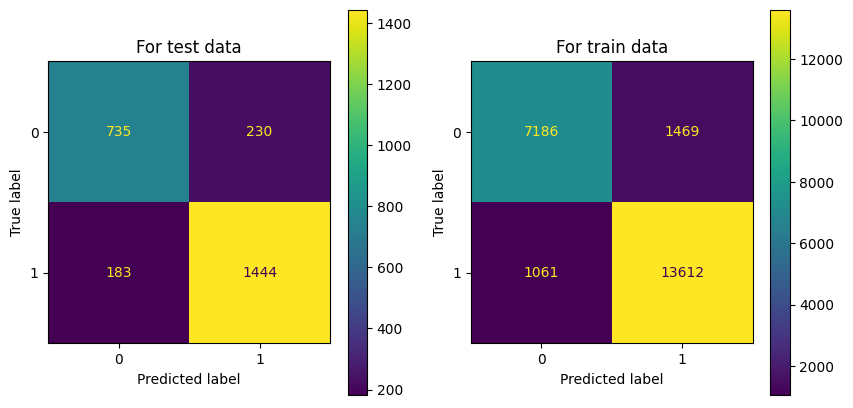

In [169]:
estimators=[ ('rf', RandomForestClassifier(n_estimators=650, max_depth= 16)),
 ('xg',XGBClassifier(n_estimators=80)),('cat',CatBoostClassifier(verbose=False,n_estimators=500))]
Stack = StackingClassifier(estimators=estimators)
evaluate(Stack,X_train, X_test, y_train, y_test, param =None)

In [47]:
# estimators=[ ('rf_s', rf_s),('xg_s',xg_s),('ada_s',ada_s),('gb_s',gb_s)]
# Stack_s = StackingClassifier(estimators=estimators)
# evaluate(Stack_s,X_train_s, X_test_s, y_train_s, y_test_s, param =None)

the test f1_score is 0.8748858447488584
the training f1_score is 0.9127421959095802


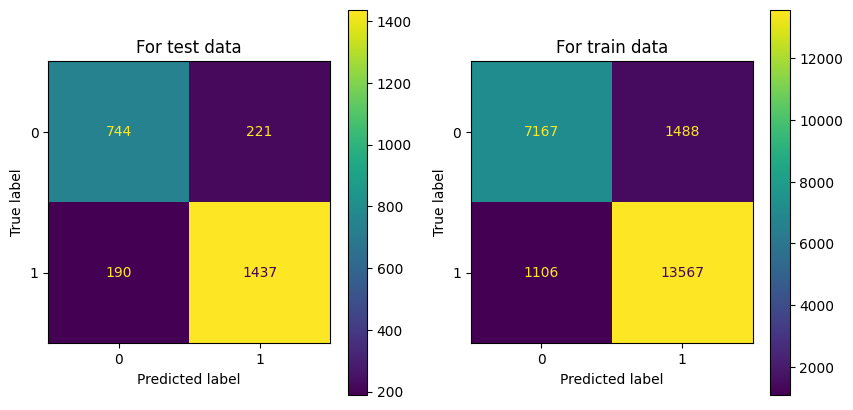

In [48]:
estimators=[('rf', rf),('xg',xg),('gb',gb),('cat',cat)]
Stack_t = StackingClassifier(estimators=estimators)
evaluate(Stack_t,X_train, X_test, y_train, y_test, param =None)

# Neural Network


In [108]:
import tensorflow as tf
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense , Activation

In [109]:
model = Sequential([
    Dense(units=51,activation='relu',input_shape=(18,)),
    Dense(units=45,activation='relu'),
    Dense(units=39,activation='relu'),
    Dense(units=33,activation='relu'),
    Dense(units=27,activation='relu'),
    Dense(units=21,activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=9, activation='relu'),
    Dense(units=3, activation='relu'),
    Dense(units=1, activation ='sigmoid'),
])
model.build(input_shape=(18,))

In [110]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 51)                969       
                                                                 
 dense_1 (Dense)             (None, 45)                2340      
                                                                 
 dense_2 (Dense)             (None, 39)                1794      
                                                                 
 dense_3 (Dense)             (None, 33)                1320      
                                                                 
 dense_4 (Dense)             (None, 27)                918       
                                                                 
 dense_5 (Dense)             (None, 21)                588       
                                                                 
 dense_6 (Dense)             (None, 15)                3

In [111]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [112]:
model.fit(X_train, y_train,
          batch_size=64,
          epochs=500,
          verbose=0,
          validation_data=(X_test, y_test))

In [114]:
y_pred_train = model.predict(X_test)
# y_pred_train = tf.nn.sigmoid(y_pred_train)

y_pred_train = np.round(y_pred_train)
y_pred_train = np.array(y_pred_train.reshape(-1))
print(f1_score(y_test,y_pred_train))

81/81 [==============================] - 0s 1ms/step
0.8298653610771114


# Testing

In [50]:
test_df = pd.read_csv('/content/Test_Data (1).csv')
test_df.drop(columns=['ID1','ID2','Any heriditary condition?'],inplace=True)

In [51]:
arr = np.array(test_df['Food preference'].values)
arr.reshape(-1)

new_arr = [x.strip().split(' ') if pd.notna(x) else [] for x in arr]

mlb = MultiLabelBinarizer()
encoded_data = mlb.fit_transform(new_arr)
encoded_df = pd.DataFrame(encoded_data, columns=mlb.classes_)

test_df = pd.concat([test_df,encoded_df],axis=1)

test_df.drop(columns=['Food preference'],axis =1 , inplace = True)
test_df

,Specific ailments,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,DX1,DX2,DX3,DX4,DX5,DX6
0,2,38,18.879331,YES,URBAN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1
1,5,46,21.231991,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0
2,37,11,17.867876,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0
3,44,10,26.886096,NO,RURAL,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,0,0,1,0
4,37,3,23.362746,NO,RURAL,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,21,27,28.880884,NO,URBAN,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0,0,1,0,0,0
6476,27,8,20.358229,NO,RURAL,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0,0,1,0,0,0
6477,39,29,27.365294,NO,RURAL,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,1
6478,29,65,22.546412,YES,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,1,0


In [52]:
test_df.isnull().sum()


Specific ailments             0
Age                           0
BMI                           0
Smoker?                       0
Living in?                    0
Follow Diet                 262
Physical activity           262
Regular sleeping hours      262
Alcohol consumption         262
Social interaction          262
Taking supplements          262
Mental health management    262
Illness count last year     262
DX1                           0
DX2                           0
DX3                           0
DX4                           0
DX5                           0
DX6                           0
dtype: int64

In [53]:
test_df.columns

Index(['Specific ailments', 'Age', 'BMI', 'Smoker?', 'Living in?',
       'Follow Diet', 'Physical activity', 'Regular sleeping hours',
       'Alcohol consumption', 'Social interaction', 'Taking supplements',
       'Mental health management', 'Illness count last year', 'DX1', 'DX2',
       'DX3', 'DX4', 'DX5', 'DX6'],
      dtype='object')

In [54]:
test_df['Living in?'] = le.transform(test_df['Living in?'])
test_df = pd.get_dummies(test_df,columns=['Smoker?'])


In [55]:
columns =test_df.columns

In [56]:
from sklearn.impute import KNNImputer
imputer_test = KNNImputer()
test_df = imputer_test.fit_transform(X=test_df)
test_df = pd.DataFrame(data=test_df,columns=columns)

test_df.columns

In [57]:
test_df.columns

Index(['Specific ailments', 'Age', 'BMI', 'Living in?', 'Follow Diet',
       'Physical activity', 'Regular sleeping hours', 'Alcohol consumption',
       'Social interaction', 'Taking supplements', 'Mental health management',
       'Illness count last year', 'DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6',
       'Smoker?_Cannot say', 'Smoker?_NO', 'Smoker?_YES'],
      dtype='object')

In [61]:
test_df.drop(['Smoker?_Cannot say','Mental health management','Taking supplements'],axis=1,inplace=True)

In [176]:
prediction = vc.predict(test_df)
prediction_s = Stack.predict(test_df)

In [177]:
result = pd.DataFrame(prediction, columns = ['predictions'])
result_s = pd.DataFrame(prediction_s, columns = ['predictions'])

In [173]:
result_s.to_csv("submissions_4.csv", index=False)
# result.to_csv("submission1_attack.csv", index=False)

In [178]:
result.to_csv("submissions_6.csv", index=False)